In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 

churn_df = pd.read_csv("../../data/telecom_churn_clean.csv")
sales_df = pd.read_csv("../../data/advertising_and_sales_clean.csv")
diabetes_df = pd.read_csv("../../data/diabetes_clean.csv")

In [11]:
X = diabetes_df[["bmi", "dpf"]].values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
y_pred = logreg.predict(X_test)


In [12]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)


# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[173  33]
 [ 67  35]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       206
           1       0.51      0.34      0.41       102

    accuracy                           0.68       308
   macro avg       0.62      0.59      0.59       308
weighted avg       0.65      0.68      0.66       308



In [13]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.38573235 0.38522883 0.2746585  0.23627249 0.26274016 0.46320155
 0.12467433 0.45826894 0.30900821 0.34725119]


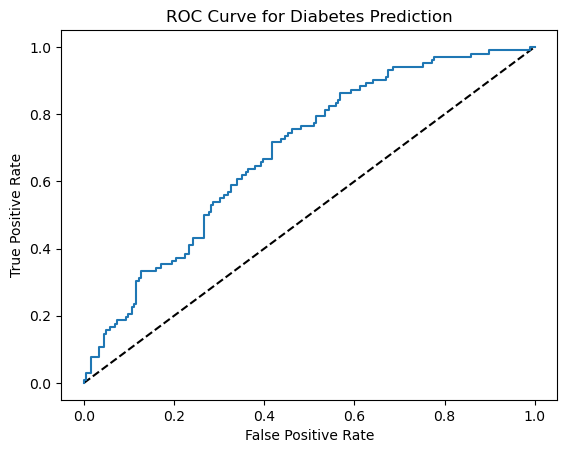

In [14]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [15]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.6868456120312203
[[173  33]
 [ 67  35]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       206
           1       0.51      0.34      0.41       102

    accuracy                           0.68       308
   macro avg       0.62      0.59      0.59       308
weighted avg       0.65      0.68      0.66       308



In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, RandomizedSearchCV


lasso = Lasso(alpha=0.3)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.09413566519431264


In [26]:
# Create the parameter space
#params = {"penalty": ["l1", "l2"],
params = {"penalty": ["l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.14294285714285712, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.8714285714285714}
Tuned Logistic Regression Best Accuracy Score: 0.6521739130434783
